|||
|---|---|
|Title|nwtimetracking|
|Author|numbworks|
|Version|4.8.0|
||Please check [docs/docs-nwtimetracking.md](../docs/docs-nwtimetracking.md) before proceeding.|

#### Global Modules

In [334]:
from typing import Optional

#### Local Modules

In [335]:
from nwtimetracking import SettingBag, ComponentBag, TimeTrackingProcessor, OPTION

#### Functions : Temp

#### Settings

In [336]:
setting_bag : SettingBag = SettingBag(
    options_tt = [OPTION.display],
    options_tts_by_month = [OPTION.display, OPTION.save],
    options_tts_by_year = [OPTION.display],
    options_tts_by_year_month = [OPTION.display],
    options_tts_by_year_month_spnv = [OPTION.display],
    options_tts_by_year_spnv = [OPTION.display],
    options_tts_by_spn = [OPTION.display, OPTION.log],
    options_tts_by_spn_spv = [],
    options_tts_by_hashtag = [OPTION.display, OPTION.log],
    options_tts_by_hashtag_year = [OPTION.display],
    options_tts_by_efs = [OPTION.display],
    options_tts_by_tr = [OPTION.display],
    options_tts_gantt_spnv = [OPTION.display, OPTION.plot, OPTION.log],
    options_tts_gantt_hseq = [OPTION.display, OPTION.plot, OPTION.log],
    options_definitions = [],
    excel_nrows = 1347,
    tts_by_year_month_spnv_display_only_spn = "nwtimetracking",
    tts_by_year_spnv_display_only_spn = "nwtimetracking",
    tts_by_spn_spv_display_only_spn = "nwtimetracking",
    md_enable_github_optimizations = True
)


#### Main : Analysis

In [337]:
tt_processor : TimeTrackingProcessor = TimeTrackingProcessor(component_bag = ComponentBag(), setting_bag = setting_bag)
tt_processor.initialize()
tt_processor.process_tt()

Date,StartTime,EndTime,Effort,Hashtag,Descriptor,IsSoftwareProject,IsReleaseDay,Year,Month
2024-12-23,20:30,22:15,1h 45m,#python,nwtimetracking v4.7.0,True,False,2024,12
2024-12-23,23:15,01:45,2h 30m,#python,nwtimetracking v4.7.0,True,False,2024,12
2024-12-24,12:15,13:15,1h 00m,#python,nwtimetracking v4.7.0,True,True,2024,12
2024-12-24,14:15,15:00,0h 45m,#python,nwtimetracking v4.7.0,True,True,2024,12
2024-12-24,15:45,18:00,2h 15m,#python,nwtimetracking v4.7.0,True,True,2024,12


In [338]:
tt_processor.process_tts_by_month()

Month,2015,↕,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
1,00h 00m,↑,18h 00m,↑,88h 30m,↓,80h 15m,↓,60h 00m,↓,29h 15m,↑,53h 00m,↓,00h 00m,↑,06h 00m,↑,45h 45m
2,00h 00m,↑,45h 30m,↑,65h 30m,↑,90h 45m,↓,73h 00m,↓,38h 00m,↓,31h 30m,↓,03h 00m,↑,24h 00m,↑,77h 45m
3,00h 00m,↑,20h 45m,↑,71h 45m,↑,89h 00m,↓,75h 30m,↓,35h 00m,↑,40h 30m,↓,06h 15m,↑,50h 15m,↑,77h 45m
4,00h 00m,↑,37h 30m,↑,68h 00m,↑,88h 30m,↓,59h 45m,↓,40h 45m,↓,19h 00m,↑,27h 30m,↓,19h 00m,↑,29h 30m
5,00h 00m,↑,53h 00m,↑,83h 00m,↑,91h 15m,↓,54h 45m,↓,14h 30m,↑,112h 45m,↓,49h 45m,↓,31h 00m,↑,43h 00m
6,00h 00m,↑,57h 45m,↓,37h 45m,↑,62h 00m,↓,29h 15m,↓,12h 00m,↑,54h 00m,↑,73h 30m,↓,24h 45m,↑,48h 00m
7,00h 00m,↑,46h 45m,↑,65h 30m,↑,69h 30m,↓,24h 15m,↑,34h 00m,↓,23h 30m,↑,51h 00m,↓,16h 30m,↑,67h 00m
8,00h 00m,↑,25h 45m,↑,45h 45m,↑,72h 00m,↓,06h 00m,↑,32h 00m,↑,110h 00m,↓,36h 30m,↑,41h 30m,↓,32h 45m
9,00h 00m,↑,89h 30m,↓,43h 45m,↑,64h 00m,↓,39h 00m,↑,44h 00m,↓,43h 30m,↑,69h 00m,↓,50h 15m,↓,48h 00m
10,08h 00m,↑,82h 15m,↓,64h 30m,↓,46h 45m,↓,45h 30m,↑,48h 00m,↓,35h 30m,↑,38h 30m,↓,20h 00m,↑,101h 30m


This content (id: 'tts_by_month') has been successfully saved as '/home/nwtimetracking/TIMETRACKINGBYMONTH.md'.


In [339]:
tt_processor.process_tts_by_year()

Year,Effort,YearlyTarget,TargetDiff,IsTargetMet
2015,18h 00m,00h 00m,+18h 00m,True
2016,615h 15m,500h 00m,+115h 15m,True
2017,762h 45m,500h 00m,+262h 45m,True
2018,829h 45m,500h 00m,+329h 45m,True
2019,515h 15m,500h 00m,+15h 15m,True
2020,470h 30m,500h 00m,-30h 30m,False
2021,537h 30m,500h 00m,+37h 30m,True
2022,467h 30m,400h 00m,+67h 30m,True
2023,320h 15m,250h 00m,+70h 15m,True
2024,811h 00m,500h 00m,+311h 00m,True


In [340]:
tt_processor.process_tts_by_year_month()

Year,Month,Effort,YearlyTotal,ToTarget
2024,1,45h 45m,45h 45m,-455h 45m
2024,2,77h 45m,123h 30m,-377h 30m
2024,3,77h 45m,201h 15m,-299h 15m
2024,4,29h 30m,230h 45m,-270h 45m
2024,5,43h 00m,273h 45m,-227h 45m
2024,6,48h 00m,321h 45m,-179h 45m
2024,7,67h 00m,388h 45m,-112h 45m
2024,8,32h 45m,421h 30m,-79h 30m
2024,9,48h 00m,469h 30m,-31h 30m
2024,10,101h 30m,571h 00m,+71h 00m


In [341]:
tt_processor.process_tts_by_year_month_spnv()

Year,Month,ProjectName,ProjectVersion,Effort,DME,%_DME,TME,%_TME
2023,9,nwtimetracking,1.0.0,11h 30m,32h 45m,35.11,50h 15m,22.89
2023,10,nwtimetracking,1.0.0,20h 00m,20h 00m,100.00,20h 00m,100.00
2023,11,nwtimetracking,1.1.0,10h 30m,14h 00m,75.00,14h 30m,72.41
2023,11,nwtimetracking,1.2.0,03h 30m,14h 00m,25.00,14h 30m,24.14
2023,12,nwtimetracking,1.3.0,02h 30m,02h 30m,100.00,22h 30m,11.11
2024,1,nwtimetracking,1.3.0,07h 15m,20h 30m,35.37,45h 45m,15.85
2024,1,nwtimetracking,2.0.0,02h 30m,20h 30m,12.20,45h 45m,5.46
2024,2,nwtimetracking,2.2.0,07h 45m,36h 45m,21.09,77h 45m,9.97
2024,3,nwtimetracking,3.0.0,03h 30m,77h 15m,4.53,77h 45m,4.50
2024,5,nwtimetracking,3.2.0,02h 00m,35h 30m,5.63,43h 00m,4.65


In [342]:
tt_processor.process_tts_by_year_spnv()

Year,ProjectName,ProjectVersion,Effort,DYE,%_DYE,TYE,%_TYE
2023,nwtimetracking,1.0.0,31h 30m,198h 30m,15.87,320h 15m,9.84
2023,nwtimetracking,1.1.0,10h 30m,198h 30m,5.29,320h 15m,3.28
2023,nwtimetracking,1.2.0,03h 30m,198h 30m,1.76,320h 15m,1.09
2023,nwtimetracking,1.3.0,02h 30m,198h 30m,1.26,320h 15m,0.78
2024,nwtimetracking,1.3.0,07h 15m,564h 45m,1.28,811h 00m,0.89
2024,nwtimetracking,2.0.0,02h 30m,564h 45m,0.44,811h 00m,0.31
2024,nwtimetracking,2.2.0,07h 45m,564h 45m,1.37,811h 00m,0.96
2024,nwtimetracking,3.0.0,03h 30m,564h 45m,0.62,811h 00m,0.43
2024,nwtimetracking,3.2.0,02h 00m,564h 45m,0.35,811h 00m,0.25
2024,nwtimetracking,3.3.0,01h 00m,564h 45m,0.18,811h 00m,0.12


In [343]:
tt_processor.process_tts_by_spn()

Hashtag,ProjectName,Effort,DE,%_DE,TE,%_TE
#python,nwtraderaanalytics,255h 00m,1991h 00m,12.81,2799h 00m,9.11
#python,nwtimetracking,178h 45m,1991h 00m,8.98,2799h 00m,6.39
#python,nwreadinglist,151h 30m,1991h 00m,7.61,2799h 00m,5.41
#python,nwpackageversions,52h 45m,1991h 00m,2.65,2799h 00m,1.88
#python,nwshared,42h 15m,1991h 00m,2.12,2799h 00m,1.51
#csharp,NW.UnivariateForecasting,208h 00m,1991h 00m,10.45,2799h 00m,7.43
#csharp,NW.NGramTextClassification,207h 30m,1991h 00m,10.42,2799h 00m,7.41
#csharp,NW.MarkdownTables,20h 45m,1991h 00m,1.04,2799h 00m,0.74
#csharp,NW.Shared.Files,05h 30m,1991h 00m,0.28,2799h 00m,0.20
#csharp,NW.Shared.Serialization,04h 15m,1991h 00m,0.21,2799h 00m,0.15


DE: Total Development Effort
%_DE: % of Total Development Effort
TE: Total Effort
%_TE: % of Total Effort


In [344]:
tt_processor.process_tts_by_spn_spv()

In [345]:
tt_processor.process_tts_by_hashtag()

Hashtag,Effort,Effort%
#untagged,2548h 45m,47.66
#csharp,1111h 30m,20.78
#python,734h 30m,13.73
#studying,423h 45m,7.92
#maintenance,338h 45m,6.33
#powershell,154h 00m,2.88
#overtime,36h 30m,0.68


Effort%: % of Total Effort


In [346]:
tt_processor.process_tts_by_hashtag_year()

Hashtag,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
#csharp,,,,,61h 45m,206h 30m,441h 45m,298h 45m,67h 30m,35h 15m
#maintenance,,,,,53h 45m,53h 30m,29h 30m,36h 30m,52h 30m,113h 00m
#overtime,,,,,01h 00m,19h 00m,,,14h 30m,02h 00m
#powershell,,,,,,116h 45m,11h 30m,21h 15m,04h 30m,
#python,,,,,,,,72h 00m,126h 30m,536h 00m
#studying,,,,,75h 45m,74h 45m,54h 45m,39h 00m,54h 45m,124h 45m
#untagged,18h 00m,615h 15m,762h 45m,829h 45m,323h 00m,,,,,


In [347]:
tt_processor.process_tts_by_efs()

StartTime,EndTime,Effort,ES_IsCorrect,ES_Expected,ES_Message


In [348]:
tt_processor.process_tts_by_tr()

TimeRangeId,Occurrences
08:00-08:45,43
08:00-08:30,25
18:00-20:00,21
17:30-18:00,18
19:00-20:00,17
17:00-17:30,15
17:15-17:45,15
17:00-17:45,11
17:00-20:00,11
18:30-20:00,10


Descriptor,StartDate,EndDate,EffortH,Duration
nwpackageversions v1.0.0,2024-10-06,2024-10-15,34,9
nwpackageversions v1.6.0,2024-10-29,2024-11-03,12,5
nwreadinglist v3.7.0,2024-09-26,2024-09-30,8,4
nwreadinglist v4.0.0,2024-11-03,2024-11-11,28,8
nwshared v1.8.0,2024-11-26,2024-12-01,13,5
nwtimetracking v4.0.0,2024-12-02,2024-12-08,32,6
nwtimetracking v4.6.0,2024-12-18,2024-12-23,29,5
nwtraderaanalytics v4.5.0,2024-12-10,2024-12-15,35,5


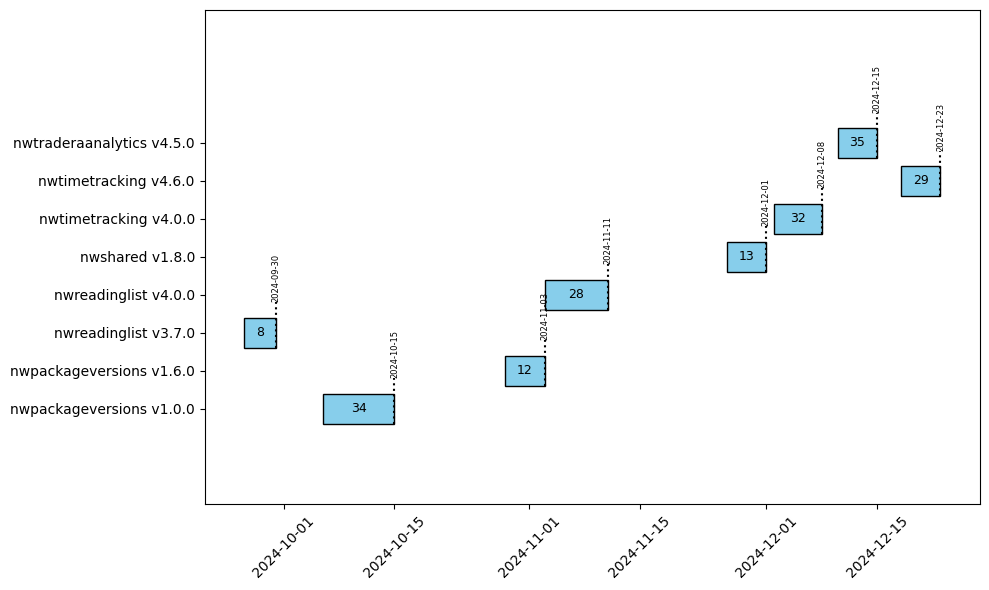

tts_gantt_spnv: Shows how much subsequent work has been performed per software project name/version.
EffortH: Total Hours of Effort between StartDate and EndDate.
Duration: Total number of days between StartDate and EndDate.
{"tts_gantt_spnv_months": 4, "tts_gantt_spnv_min_duration": 4}


In [349]:
tt_processor.process_tts_gantt_spnv()

HashtagSeq,StartDate,EndDate,EffortH,Duration
#python27,2024-08-31,2024-09-30,48,30
#python28,2024-10-01,2024-10-15,41,14
#python32,2024-10-28,2024-11-03,13,6
#python35,2024-11-07,2024-11-11,25,4
#python36,2024-11-26,2024-12-02,25,6
#python39,2024-12-09,2024-12-24,105,15
#studying84,2024-11-12,2024-11-18,17,6
#studying85,2024-11-19,2024-11-24,13,5


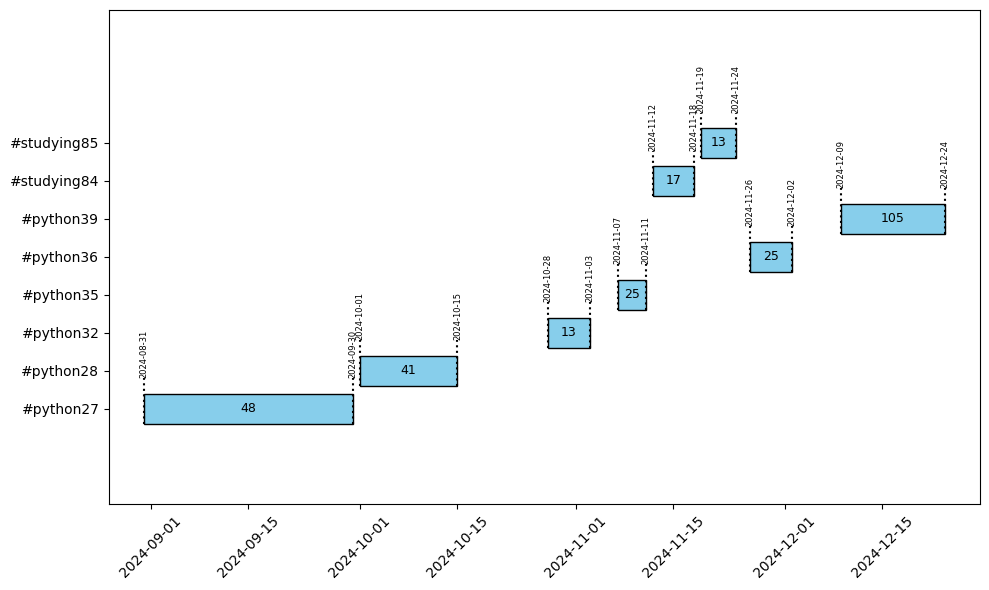

tts_gantt_hseq: Shows how much subsequent work has been performed per hashtag.
HashtagSeq: Period of time in which the same hashtag has been used without breaks.
EffortH: Total Hours of Effort between StartDate and EndDate.
Duration: Total number of days between StartDate and EndDate.
{"tts_gantt_hseq_months": 4, "tts_gantt_hseq_min_duration": 4}


In [350]:
tt_processor.process_tts_gantt_hseq()

In [351]:
tt_processor.process_definitions()

In [355]:
from nwtimetracking import TTSummary, EffortHighlighter, EFFORTMODE, EFFORTSTYLE, TTDataFrameHelper
from pandas import DataFrame

summary : TTSummary = tt_processor.get_summary()
effort_highlighter : EffortHighlighter = EffortHighlighter(df_helper = TTDataFrameHelper())
mode : EFFORTMODE = EFFORTMODE.top_one_effort_per_row
style : EFFORTSTYLE = EFFORTSTYLE.textual_highlight

df : DataFrame = summary.tts_by_month_tpl[1]
styler = effort_highlighter.apply(df = df, mode = mode, style = style)

display(styler)

,Month,2015,↕,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
0,1,00h 00m,↑,18h 00m,↑,[[ 88h 30m ]],↓,80h 15m,↓,60h 00m,↓,29h 15m,↑,53h 00m,↓,00h 00m,↑,06h 00m,↑,45h 45m
1,2,00h 00m,↑,45h 30m,↑,65h 30m,↑,[[ 90h 45m ]],↓,73h 00m,↓,38h 00m,↓,31h 30m,↓,03h 00m,↑,24h 00m,↑,77h 45m
2,3,00h 00m,↑,20h 45m,↑,71h 45m,↑,[[ 89h 00m ]],↓,75h 30m,↓,35h 00m,↑,40h 30m,↓,06h 15m,↑,50h 15m,↑,77h 45m
3,4,00h 00m,↑,37h 30m,↑,68h 00m,↑,[[ 88h 30m ]],↓,59h 45m,↓,40h 45m,↓,19h 00m,↑,27h 30m,↓,19h 00m,↑,29h 30m
4,5,00h 00m,↑,53h 00m,↑,83h 00m,↑,91h 15m,↓,54h 45m,↓,14h 30m,↑,[[ 112h 45m ]],↓,49h 45m,↓,31h 00m,↑,43h 00m
5,6,00h 00m,↑,57h 45m,↓,37h 45m,↑,62h 00m,↓,29h 15m,↓,12h 00m,↑,54h 00m,↑,[[ 73h 30m ]],↓,24h 45m,↑,48h 00m
6,7,00h 00m,↑,46h 45m,↑,65h 30m,↑,[[ 69h 30m ]],↓,24h 15m,↑,34h 00m,↓,23h 30m,↑,51h 00m,↓,16h 30m,↑,67h 00m
7,8,00h 00m,↑,25h 45m,↑,45h 45m,↑,72h 00m,↓,06h 00m,↑,32h 00m,↑,[[ 110h 00m ]],↓,36h 30m,↑,41h 30m,↓,32h 45m
8,9,00h 00m,↑,[[ 89h 30m ]],↓,43h 45m,↑,64h 00m,↓,39h 00m,↑,44h 00m,↓,43h 30m,↑,69h 00m,↓,50h 15m,↓,48h 00m
9,10,08h 00m,↑,82h 15m,↓,64h 30m,↓,46h 45m,↓,45h 30m,↑,48h 00m,↓,35h 30m,↑,38h 30m,↓,20h 00m,↑,[[ 101h 30m ]]


In [ ]:
style = EFFORTSTYLE.color_highlight

df = summary.tts_by_hashtag_year_df
styler = effort_highlighter.apply(df = df, mode = mode, style = style)

display(styler)

Year,Hashtag,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,#csharp,,,,,61h 45m,206h 30m,441h 45m,298h 45m,67h 30m,35h 15m
1,#maintenance,,,,,53h 45m,53h 30m,29h 30m,36h 30m,52h 30m,113h 00m
2,#overtime,,,,,01h 00m,19h 00m,,,14h 30m,02h 00m
3,#powershell,,,,,,116h 45m,11h 30m,21h 15m,04h 30m,
4,#python,,,,,,,,72h 00m,126h 30m,536h 00m
5,#studying,,,,,75h 45m,74h 45m,54h 45m,39h 00m,54h 45m,124h 45m
6,#untagged,18h 00m,615h 15m,762h 45m,829h 45m,323h 00m,,,,,
